## Assignment-1
### Name: Harshitha Anishetty
### StudenID: 8903318

Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease).
A model of this decision problem could be used by a program to provide decision support to medical professionals.
  	
   You can follow the following steps :
  	
   •	Data Analysis
  	
   •	Data Preprocessing
  	
   •	Data Standardization
  	
   •	Model Training
  	
   •	Measure your model’s accuracy.
  	   
      Use 80% of samples as training data size.

   •	Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.
  	
You can download the Dataset from: https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification  


#### Step 1: Data Analysis and Understanding

#### Import the libraries

In [271]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset

In [272]:
data = pd.read_csv('../../practical_labs/pd_speech_features.csv', header=1)
data.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


#### Explore the dataset

In [273]:
# Summary of the dataset, including data types and missing values
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None
               id      gender         PPE         DFA        RPDE   numPulses   
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000  \
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter   
count        756.000000     

#### Step 2: Data Preprocessing

In [274]:
# check for missing values
print(data.isnull().sum())

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


In [275]:
# Drop the 'id' column as it does not contribute to the prediction
data.drop(columns=['id'], inplace=True)

In [276]:

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['class'])
y = data['class']


##### Disctribution of target variable

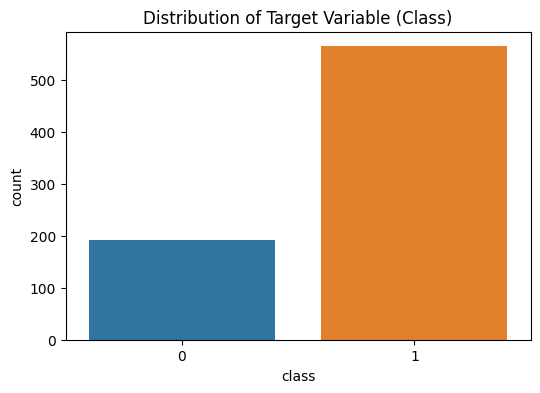

In [277]:
plt.figure(figsize=(6, 4))
sns.countplot(data, x='class')
plt.title('Distribution of Target Variable (Class)')
plt.show()

#### Step 3: Data Standardization

In [278]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Split the data into train and test

In [279]:
# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


#### Step 4: Model Training

In [280]:

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

/Users/harshithaanishetty/Desktop/MLFoundations/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

#### Step 5: Measure Model Accuracy

In [281]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display a classification report and confusion matrix for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8618421052631579

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.89      0.93      0.91       114

    accuracy                           0.86       152
   macro avg       0.82      0.79      0.81       152
weighted avg       0.86      0.86      0.86       152


Confusion Matrix:
[[ 25  13]
 [  8 106]]


#### Step 6: Build a Predictive System

In [282]:

single_instance = data.iloc[0, :-1].values

# Standardize the single instance data using the same scaler
single_instance = scaler.transform(single_instance.reshape(1, -1))

# Make a prediction for the single instance
prediction = model.predict(single_instance)

# Print the prediction
if prediction[0] == 1:
    print("The patient is likely to have Parkinson's disease.")
else:
    print("The patient is not likely to have Parkinson's disease.")


The patient is likely to have Parkinson's disease.


/Users/harshithaanishetty/Desktop/MLFoundations/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
